In [1]:
"""
TP 29/09/2023
Plot surface tracer concentration and vertical distribution at several time step
"""

import sys 
sys.path.append('/home2/datahome/tpicard/python/Python_Modules_RREX2008/')

######################
#import useful modules
######################

from Modules import *
from Modules_gula import *
from matplotlib.offsetbox import AnchoredText
import cartopy.crs as ccrs
import cartopy
from datetime import date, timedelta, datetime
import netCDF4
import scipy.stats as st
import matplotlib as mpl
import matplotlib.colors as colors
import netCDF4 as nc4

# SUBDOMAIN RREX2008
#simul_rrex = load(simul = 'rrex2008_feb [0,802,0,1002,[1,200,1]] ' + format(8), light=False, output=True)

dir_save = "/home2/datawork/tpicard/M2_intership/RREX2008_FT_3h/figures/"
dpi_nb = 50

simul_rrex = load(simul = 'rrex2008_avg_3h_feb [0,802,0,1002,[1,200,1]] ' + format(0), light=False, output=True)
mld_d0 = var('hbls_rho',simul_rrex).data


simul_rrex = load(simul = 'rrex2008_avg_3h_feb [0,802,0,1002,[1,200,1]] ' + format(8*9), light=False, output=True)

#depth = 0
z_r,z_w = tools.get_depths(simul_rrex)
tpas_ini = var('tpas01',simul_rrex).data
mld_d_ini = var('hbls_rho',simul_rrex).data


simul_rrex = load(simul = 'rrex2008_avg_3h_feb [0,802,0,1002,[1,200,1]] ' + format(8*19), light=False, output=True)

#depth = 0
z_r,z_w = tools.get_depths(simul_rrex)
tpas_mid = var('tpas01',simul_rrex).data
mld_d_mid = var('hbls_rho',simul_rrex).data

##############################################################
# Define horizontal coordinates (deg, km, or grid points)
########################################################

coord = 'deg'

lon_rrex = simul_rrex.x; lat_rrex = simul_rrex.y

[lon_km_rrex,lat_km_rrex] = np.meshgrid(np.arange(simul_rrex.x.shape[0])+simul_rrex.coord[2],np.arange(simul_rrex.x.shape[1])+simul_rrex.coord[0])
lon_km_rrex = (lon_km_rrex/np.mean(simul_rrex.pm)*1e-3).T
lat_km_rrex = (lat_km_rrex/np.mean(simul_rrex.pn)*1e-3).T

simul_rrex = load(simul = 'rrex2008_avg_3h_feb [0,802,0,1002,[1,200,1]] ' + format(230), light=False, output=True)

tpas_last = var('tpas01',simul_rrex).data
mld_d_last = var('hbls_rho',simul_rrex).data


simulname is None
args (['rrex2008_avg_3h_feb', '[0,802,0,1002,[1,200,1]]', '0'],)
args[0] ['rrex2008_avg_3h_feb', '[0,802,0,1002,[1,200,1]]', '0']
len(args[0]) 3
/home/datawork-lops-rrex/tpicard/OUTPUTS_RREX2008_Full_tracer
/home/datawork-lops-rrex/tpicard/OUTPUTS_RREX2008_Full_tracer
time of simulation is: 0
coord
loading /home/datawork-lops-rrex/tpicard/OUTPUTS_RREXNUM200/HIS/@expname@_@freq@_grid.nc
loading /home/datawork-lops-rrex/tpicard/Config_RREX2008_MASTER_PAR_FILES/AVG/rrex2008_avg_3h_feb.nc
get domain [0,802,0,1002,[1,200,1]] [0,80
coordmax
loading /home/datawork-lops-rrex/tpicard/OUTPUTS_RREXNUM200/HIS/@expname@_@freq@_grid.nc
loading /home/datawork-lops-rrex/tpicard/Config_RREX2008_MASTER_PAR_FILES/AVG/rrex2008_avg_3h_feb.nc
get domain [0,1e9,0,1e9,[1,1e9,1]] [0,1e
cst
read Cs_r in ncfile.variables
dt
dt is read in  /home/datawork-lops-rrex/tpicard/Config_RREX2008_MASTER_PAR_FILES/AVG/rrex2008_avg_3h_feb.nc
[0, 802, 0, 1002, array([  1,   2,   3,   4,   5,   6,   7,   8, 

In [45]:
simul_rrex = load(simul = 'rrex2008_avg_3h_feb [0,802,0,1002,[1,200,1]] ' + format(230), light=False, output=False)
print(simul_rrex.date)

/home/datawork-lops-rrex/tpicard/OUTPUTS_RREX2008_Full_tracer
/home/datawork-lops-rrex/tpicard/OUTPUTS_RREX2008_Full_tracer
Mar 01 - 07:28


In [2]:
ztarget = 0.6* mld_d0[400,300]
dz = mld_d0[400,300]/8 
tpas0 = 0.5*(1+np.tanh((z_r[400,300,50:]+ztarget)/dz))

<ipython-input-5-935c2869d138>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cf = plt.pcolormesh(lon_km_rrex,lat_km_rrex,tpas_ini[:,:,-1],cmap = plt.cm.viridis,vmin=0,vmax=0.6)
<ipython-input-5-935c2869d138>:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(lon_km_rrex,lat_km_rrex,tpas_mid[:,:,-1],cmap = plt.cm.viridis,vmin=0,vmax=0.6)
<ipython-input-5-935c2869d138>:43: MatplotlibDeprecationWarning: shading='flat' when X and Y have the sam

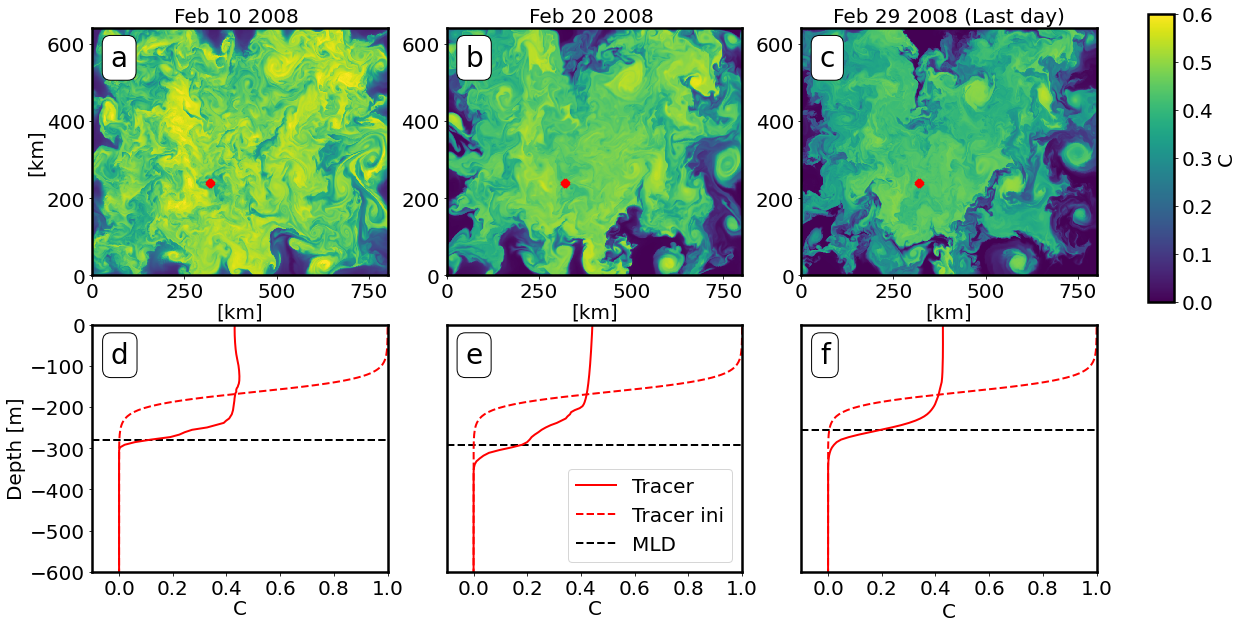

In [5]:


fig = plt.figure(figsize=(18,10))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50
props = dict(boxstyle='round', facecolor='white', alpha=1)

ax = fig.add_subplot(2,3,1)
plt.title("Feb 10 2008 ",size=20)
textstr = 'a'
plt.text(50, 600, textstr, fontsize=28,
        verticalalignment='top', bbox=props,ha='left', va='top')

plt.xticks([0,250,500,750], [0,250,500,750],size=20)
plt.xlabel('[km]',size=20,labelpad=1)
plt.yticks([0,200,400,600], [0,200,400,600],size=20)
plt.ylabel('[km]',size=20,labelpad=1)
cf = plt.pcolormesh(lon_km_rrex,lat_km_rrex,tpas_ini[:,:,-1],cmap = plt.cm.viridis,vmin=0,vmax=0.6)
plt.scatter(lon_km_rrex[400,300],lat_km_rrex[400,300],c='red',linewidths=6,marker="x")

ax = fig.add_subplot(2,3,2)

plt.title("Feb 20 2008 ",size=20)
textstr = 'b'
plt.text(50, 600, textstr, fontsize=28,
        verticalalignment='top', bbox=props,ha='left', va='top')

plt.xticks([0,250,500,750], [0,250,500,750],size=20)
plt.xlabel('[km]',size=20,labelpad=1)
plt.yticks([0,200,400,600], [0,200,400,600],size=20)
plt.pcolormesh(lon_km_rrex,lat_km_rrex,tpas_mid[:,:,-1],cmap = plt.cm.viridis,vmin=0,vmax=0.6)
plt.scatter(lon_km_rrex[400,300],lat_km_rrex[400,300],c='red',linewidths=6,marker="x")


ax = fig.add_subplot(2,3,3)

plt.title("Feb 29 2008 (Last day)",size=20)
textstr = 'c'
plt.text(50, 600, textstr, fontsize=28,
        verticalalignment='top', bbox=props,ha='left', va='top')

plt.xticks([0,250,500,750], [0,250,500,750],size=20)
plt.xlabel('[km]',size=20,labelpad=1)
plt.yticks([0,200,400,600], [0,200,400,600],size=20)
plt.pcolormesh(lon_km_rrex,lat_km_rrex,tpas_last[:,:,-1],cmap = plt.cm.viridis,vmin=0,vmax=0.6)


plt.scatter(lon_km_rrex[400,300],lat_km_rrex[400,300],c='red',linewidths=6,marker="x")

ax = fig.add_subplot(2,3,4)

textstr = 'd'
plt.text(-0.03, -40, textstr, fontsize=28,
        verticalalignment='top', bbox=props,ha='left', va='top')


plt.xlabel('[km]',size=20,labelpad=1)

plt.plot(tpas_ini[400,300,50:],z_r[400,300,50:],color='red',linewidth=2,label="Tracer")
plt.plot(tpas0,z_r[400,300,50:],color='red',linewidth=2,linestyle='--')
plt.hlines(-mld_d_ini[400,300],-0.1,1,linestyle='--',color='k',linewidth=2,label="MLD")
plt.xlim(-0.1,1)
plt.yticks(size=20)
plt.xticks(size=20)
plt.ylabel('Depth [m]',size=20)
plt.xlabel('C',size=20)
plt.ylim(-600,0)
#plt.legend(prop={'size': 20})

ax = fig.add_subplot(2,3,5)

textstr = 'e'
plt.text(-0.03, -40, textstr, fontsize=28,
        verticalalignment='top', bbox=props,ha='left', va='top')


plt.xlabel('[km]',size=20,labelpad=1)

plt.plot(tpas_mid[400,300,50:],z_r[400,300,50:],color='red',linewidth=2,label="Tracer")
plt.plot(tpas0,z_r[400,300,50:],color='red',linewidth=2,linestyle='--',label="Tracer ini")
plt.hlines(-mld_d_mid[400,300],-0.1,1,linestyle='--',color='k',linewidth=2,label="MLD")
plt.xlim(-0.1,1)
plt.yticks([],[],size=20)
plt.xticks(size=20)
plt.xlabel('C',size=20)
plt.ylim(-600,0)
plt.legend(prop={'size': 20})



ax = fig.add_subplot(2,3,6)
textstr = 'f'
plt.text(-0.03, -40, textstr, fontsize=28,
        verticalalignment='top', bbox=props,ha='left', va='top')


plt.yticks([],[],size=20)
plt.xticks(size=20)
plt.xlabel('C',size=20)
plt.plot(tpas_last[400,300,50:],z_r[400,300,50:],color='red',linewidth=2)
plt.plot(tpas0,z_r[400,300,50:],color='red',linewidth=2,linestyle='--')
plt.hlines(-mld_d_last[400,300],-0.1,1,linestyle='--',color='k',linewidth=2)
plt.xlim(-0.1,1)
plt.ylim(-600,0)

    
cbaxes = fig.add_axes([0.94, 0.5, 0.02, 0.4]) 
cb = plt.colorbar(cf,ax = ax, cax = cbaxes,orientation="vertical")  
cb.set_label('C', fontsize=20)
cb.ax.tick_params(labelsize=20)

dir_save='/home2/datawork/tpicard/M2_intership/RREX2008_FT_3h/figures/'
plt.savefig(dir_save+"tracer_surface_and_ini.pdf",bbox_inches='tight',dpi=dpi_nb)